<h1>Toyota car price prediction with Pyspark</h1>

In [1]:
import findspark
findspark.init()

import pyspark
findspark.find()

from pyspark.sql import SparkSession
from pyspark.sql.functions import count

spark = (SparkSession
         .builder
         .appName("Project_Nhom9")
         .getOrCreate())

<h1>1. Importing Libraries and Reading the Dataset</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sns
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

In [3]:
carDF = pd.read_csv("./ToyotaCorolla.csv")
carDF.head(20)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


In [4]:
carDF.count()

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64

- Description of the data set: The data set includes 10 attributes (including 7 variables, 3 categorical variables):

    + price: Toyota car price (in Euro)

    + Age: age of the vehicle (in years).

    + KM: the distance traveled by the vehicle (in KM)

    + HP: Horsepower (in HP, 1HP=0.746 kW)

    + MetColor: metallic (0: no, 1: yes)

    + Automatic: Automatic number (0: no, 1: yes)

    + CC: Cylinder volume (in cubic centimeters)

    + Doors: Number of doors

    + Weight: Weight of the vehicle.

    + FuelType: Fuel Type

- Input: Age, KM, HP, CC, Door, Weight

- Output: Price

In [5]:
carDF.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


<h1>2. Data Preprocessing and Visualization</h1>

In [6]:
carDF.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

<h2>Correlation Matrix</h2>

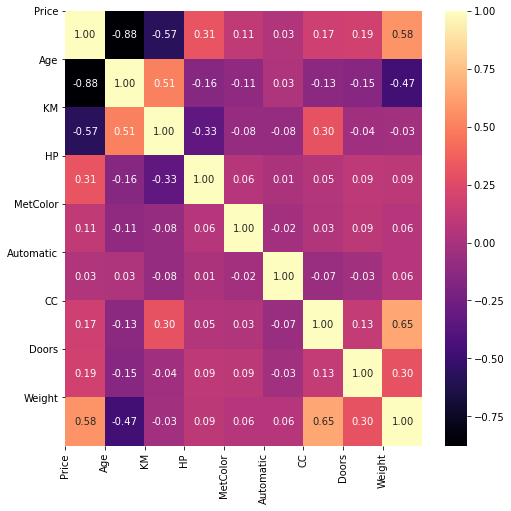

In [7]:
corr = carDF.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<h2>Car price chart</h2>

C:\Users\vohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


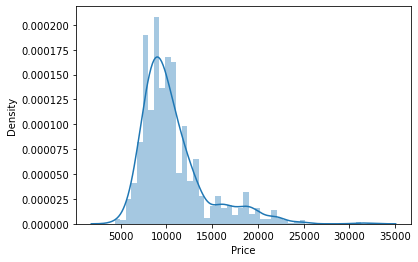

In [8]:
carPLOT=pd.read_csv("./ToyotaCorolla.csv",encoding="utf-8")
import seaborn as sns
sns.distplot(carPLOT['Price']);

Text(0.5, 1.0, 'Relationship between Price and Age')

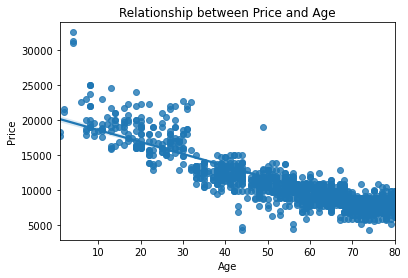

In [9]:
sns.regplot(y="Price", x="Age", data=carPLOT, fit_reg = True)
plt.title("Relationship between Price and Age")

Text(0.5, 1.0, 'Relationship between Price and KM')

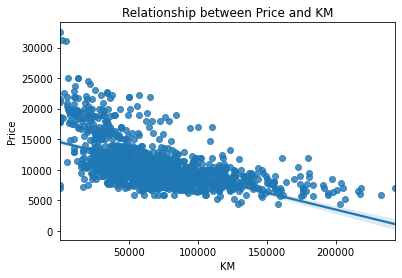

In [10]:
sns.regplot(y="Price", x="KM", data=carPLOT, fit_reg = True)
plt.title("Relationship between Price and KM")

Text(0.5, 1.0, 'Relationship between Price and weight')

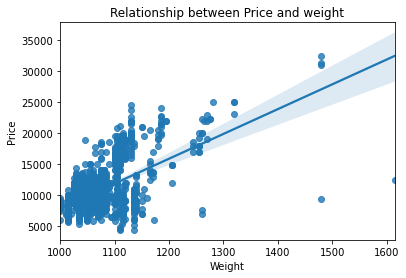

In [11]:
sns.regplot(y="Price", x="Weight", data=carPLOT, fit_reg = True)
plt.title("Relationship between Price and weight")

In [12]:
carDF = pd.get_dummies(carDF)
carDF

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,1025,0,0,1
1432,10845,72,19000,86,0,0,1300,3,1015,0,0,1
1433,8500,71,17016,86,0,0,1300,3,1015,0,0,1
1434,7250,70,16916,86,1,0,1300,3,1015,0,0,1


In [13]:
carDF.to_csv("carDF.csv",index=False)

In [14]:
carDF = (spark.read.option("HEADER", True).option("inferSchema", True).csv("./carDF.csv"))
carDF.show()

+-----+---+-----+---+--------+---------+----+-----+------+------------+---------------+---------------+
|Price|Age|   KM| HP|MetColor|Automatic|  CC|Doors|Weight|FuelType_CNG|FuelType_Diesel|FuelType_Petrol|
+-----+---+-----+---+--------+---------+----+-----+------+------------+---------------+---------------+
|13500| 23|46986| 90|       1|        0|2000|    3|  1165|           0|              1|              0|
|13750| 23|72937| 90|       1|        0|2000|    3|  1165|           0|              1|              0|
|13950| 24|41711| 90|       1|        0|2000|    3|  1165|           0|              1|              0|
|14950| 26|48000| 90|       0|        0|2000|    3|  1165|           0|              1|              0|
|13750| 30|38500| 90|       0|        0|2000|    3|  1170|           0|              1|              0|
|12950| 32|61000| 90|       0|        0|2000|    3|  1170|           0|              1|              0|
|16900| 27|94612| 90|       1|        0|2000|    3|  1245|      

<h2>Divide data into Train set and Test set</h2>

In [15]:
from pyspark.ml.feature import VectorAssembler
trainDF, testDF = carDF.randomSplit([.8, .2], seed=100)
assembler = VectorAssembler(inputCols=["Age", "KM", "MetColor", "Automatic" ,"HP", "CC", "Doors", "Weight", "FuelType_CNG", "FuelType_Diesel", "FuelType_Petrol"],outputCol='features')
assembler_train = assembler.setHandleInvalid("skip").transform(trainDF)
final_train = assembler_train.select('features','Price')
final_train.show(3)

+--------------------+-----+
|            features|Price|
+--------------------+-----+
|[44.0,158320.0,0....| 4350|
|[74.0,203254.0,1....| 4400|
|[56.0,129155.0,0....| 4450|
+--------------------+-----+
only showing top 3 rows



<h3>My Train set</h3>

In [16]:
trainDF.sort(trainDF.Price.desc()).show()

+-----+---+-----+---+--------+---------+----+-----+------+------------+---------------+---------------+
|Price|Age|   KM| HP|MetColor|Automatic|  CC|Doors|Weight|FuelType_CNG|FuelType_Diesel|FuelType_Petrol|
+-----+---+-----+---+--------+---------+----+-----+------+------------+---------------+---------------+
|32500|  4|    1|116|       0|        0|2000|    5|  1480|           0|              1|              0|
|31275|  4| 1500|116|       1|        0|2000|    5|  1480|           0|              1|              0|
|31000|  4| 4000|116|       1|        0|2000|    5|  1480|           0|              1|              0|
|24990|  8| 6000| 90|       1|        0|2000|    5|  1280|           0|              1|              0|
|24950|  8|13253|116|       1|        0|2000|    5|  1320|           0|              1|              0|
|24950|  8|13253|116|       1|        0|2000|    5|  1320|           0|              1|              0|
|24500| 13|19988|110|       1|        0|1600|    5|  1130|      

<h3>My Test Set</h3>

In [17]:
testDF.sort(testDF.Price.desc()).show()

+-----+---+-----+---+--------+---------+----+-----+------+------------+---------------+---------------+
|Price|Age|   KM| HP|MetColor|Automatic|  CC|Doors|Weight|FuelType_CNG|FuelType_Diesel|FuelType_Petrol|
+-----+---+-----+---+--------+---------+----+-----+------+------------+---------------+---------------+
|23950| 19|21684|192|       1|        0|1800|    5|  1185|           0|              0|              1|
|22500| 32|34131|192|       1|        0|1800|    3|  1185|           0|              0|              1|
|22000| 28|18739|192|       0|        0|1800|    3|  1185|           0|              0|              1|
|21950| 19|50005|110|       1|        0|2000|    3|  1265|           0|              1|              0|
|21950| 31|64982|192|       1|        0|1800|    5|  1195|           0|              0|              1|
|21950| 27|49866|192|       1|        0|1800|    5|  1195|           0|              0|              1|
|21750| 16|36000|110|       1|        0|1600|    5|  1130|      

<h1>Create Pipline and Build All Model</h1>

In [18]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Price')

In [19]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='Price')

In [20]:
from pyspark.ml.regression import RandomForestRegressor
rfr = RandomForestRegressor(featuresCol = 'features', labelCol='Price', maxDepth=10, numTrees=100)

In [21]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol='Price')

In [22]:
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer, VectorIndexer, IndexToString
stages_ = [lr, dt, rfr, gbt]
for stage in stages_:
    
    #build pipeline for each method
    pipeline = Pipeline(stages=[assembler, stage])

    model = pipeline.fit(trainDF)
    
    # predict and evaluate model

    predictions = model.transform(testDF)

    predictions.select("prediction","Price", "features").show(5)

    evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")

    # RMSE
    rmse = evaluator.evaluate(predictions)
    print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

    # R squared
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
    print("R Squared (R^2) on test data = %g" % r2)

+------------------+-----+--------------------+
|        prediction|Price|            features|
+------------------+-----+--------------------+
|11221.089147924416| 4750|[44.0,131273.0,1....|
| 5796.419360413697| 5750|[76.0,183277.0,0....|
| 6457.407290332073| 5900|[73.0,232940.0,0....|
| 6847.738283644322| 5950|[72.0,105856.0,0....|
| 6626.694761679699| 5950|[78.0,82595.0,1.0...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1374.12
R Squared (R^2) on test data = 0.86507
+-----------------+-----+--------------------+
|       prediction|Price|            features|
+-----------------+-----+--------------------+
|           9200.0| 4750|[44.0,131273.0,1....|
|           7605.0| 5750|[76.0,183277.0,0....|
|           7605.0| 5900|[73.0,232940.0,0....|
|7986.563451776649| 5950|[72.0,105856.0,0....|
|7986.563451776649| 5950|[78.0,82595.0,1.0...|
+-----------------+-----+--------------------+
only showing top 5 rows

Ro

<h1>Hyperparameter Tuning</h1>

In [23]:
maxDepth = []
for i in range(1,30):
  maxDepth.append(i)

<h2>LINEAR REGRESSION</h2>

In [24]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder

paramGrid_lr = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.05,0.1,0.5,1]).addGrid(lr.elasticNetParam, [0, 1,0.5]).build()
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName='rmse')
pipeline = Pipeline(stages=[assembler, lr])
cv = CrossValidator(estimator=pipeline,evaluator = evaluator,estimatorParamMaps = paramGrid_lr,numFolds=3,seed=42)
# fit on Trainset
Model = cv.fit(trainDF)
print(pd.DataFrame(list(zip(Model.getEstimatorParamMaps(), Model.avgMetrics)),columns=['Regression','RMSE']).sort_values(by="RMSE"))

                                           Regression         RMSE
0   {LinearRegression_9f3bb756c9ad__regParam: 0.01...  1375.558373
3   {LinearRegression_9f3bb756c9ad__regParam: 0.05...  1375.561730
6   {LinearRegression_9f3bb756c9ad__regParam: 0.1,...  1375.565924
5   {LinearRegression_9f3bb756c9ad__regParam: 0.05...  1375.588188
9   {LinearRegression_9f3bb756c9ad__regParam: 0.5,...  1375.599429
4   {LinearRegression_9f3bb756c9ad__regParam: 0.05...  1375.609661
8   {LinearRegression_9f3bb756c9ad__regParam: 0.1,...  1375.613451
12  {LinearRegression_9f3bb756c9ad__regParam: 1.0,...  1375.641177
2   {LinearRegression_9f3bb756c9ad__regParam: 0.01...  1375.785147
11  {LinearRegression_9f3bb756c9ad__regParam: 0.5,...  1375.791567
1   {LinearRegression_9f3bb756c9ad__regParam: 0.01...  1375.805271
7   {LinearRegression_9f3bb756c9ad__regParam: 0.1,...  1375.875272
10  {LinearRegression_9f3bb756c9ad__regParam: 0.5,...  1376.031699
14  {LinearRegression_9f3bb756c9ad__regParam: 1.0,...  1376.06

<h2>Decision Tree</h2>

In [25]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder

paramGrid_dt = (ParamGridBuilder().addGrid(dt.maxDepth, maxDepth).build())
# evaluate model by R2
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName='rmse')

pipeline = Pipeline(stages=[assembler, dt])

cv = CrossValidator(estimator=pipeline,evaluator = evaluator,
                    estimatorParamMaps = paramGrid_dt,
                    numFolds=3,seed=42)

# fit on TrainDF
dt.setMaxBins(40)

Model = cv.fit(trainDF)

print(pd.DataFrame(list(zip(Model.getEstimatorParamMaps(), Model.avgMetrics)) ,
                     columns=['Regression','RMSE']).sort_values(by="RMSE"))

                                           Regression         RMSE
5   {DecisionTreeRegressor_6e2e63601104__maxDepth: 6}  1290.550730
4   {DecisionTreeRegressor_6e2e63601104__maxDepth: 5}  1318.186777
6   {DecisionTreeRegressor_6e2e63601104__maxDepth: 7}  1369.406350
3   {DecisionTreeRegressor_6e2e63601104__maxDepth: 4}  1384.694899
7   {DecisionTreeRegressor_6e2e63601104__maxDepth: 8}  1392.790291
8   {DecisionTreeRegressor_6e2e63601104__maxDepth: 9}  1436.906139
9   {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1485.760550
2   {DecisionTreeRegressor_6e2e63601104__maxDepth: 3}  1505.825738
10  {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1524.077031
11  {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1545.317329
12  {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1563.158556
13  {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1569.128164
14  {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1578.471638
15  {DecisionTreeRegressor_6e2e63601104__maxDepth:...  1581.83

<h2>Random Forest</h2>

- In the hyperparameter is the numtree below which can give from 10 to 160 if your hardware is good. However, due to my hardware limitations, I only ran from 50 to 70 in this range RMSE of the random forest in our model gave a pretty good value (since I ran it through once 10-160 it takes 36 hours)

In [26]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder

paramGrid_rfr = ParamGridBuilder().addGrid(rfr.numTrees, [10,40,60,80,100,120,150,152,155,160]).addGrid(rfr.maxDepth, maxDepth).build()
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName='rmse')

pipeline = Pipeline(stages=[assembler, rfr])

cv = CrossValidator(estimator=pipeline,evaluator = evaluator,
                    estimatorParamMaps = paramGrid_rfr,
                    numFolds=3,seed=42)  
rfr.setMaxBins(40)
rfr_model = cv.fit(trainDF)
print(pd.DataFrame(list(zip(rfr_model.getEstimatorParamMaps(), rfr_model.avgMetrics)) ,
                     columns=['Regression','RMSE']).sort_values(by="RMSE"))

                                           Regression         RMSE
37  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  1167.402435
38  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  1168.600814
39  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  1170.275319
36  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  1170.927181
40  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  1172.142394
..                                                ...          ...
30  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  1865.485221
0   {RandomForestRegressor_8b0ece4ff16d__numTrees:...  2369.149427
29  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  2373.757149
58  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  2377.949595
87  {RandomForestRegressor_8b0ece4ff16d__numTrees:...  2409.427118

[116 rows x 2 columns]


In [27]:
best_pipeline =  rfr_model.bestModel 
rfr_best_model = best_pipeline.stages[1]
print('numTrees:', rfr_best_model.getNumTrees)
print('maxDepth:', rfr_best_model.getOrDefault('maxDepth'))

numTrees: 152
maxDepth: 9


<h2>Gradient Boosting Tree</h2>

- With gradient boosting tree I gave numtree from 10-100 but after one run (36 hours) I found numtree from 50-60 gives very good RMSE so I ran numtree 50-60 (due to my hardware condition there is limit). If your hardware is good I recommend running from 10-100 (distance between values is 1)

In [28]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder
paramGrid_gbt = (ParamGridBuilder()
                 .addGrid(gbt.maxDepth,maxDepth)
                 .addGrid(gbt.maxIter, [10,40,50,54,58,60,80,100])
                 .build())
evaluator_gbt = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName='rmse')
pipeline = Pipeline(stages=[assembler, gbt])
cv = CrossValidator(estimator=pipeline,evaluator = evaluator_gbt,
                    estimatorParamMaps = paramGrid_gbt,
                    numFolds=3,
                    parallelism=4, seed=42)
gbt.setMaxBins(40)
gbt_model = cv.fit(trainDF)
print(pd.DataFrame(list(zip(gbt_model.getEstimatorParamMaps(), gbt_model.avgMetrics)) ,
                     columns=['Regression','RMSE']).sort_values(by="RMSE"))

                                            Regression         RMSE
14   {GBTRegressor_f7180c10bd8e__maxDepth: 3, GBTRe...  1172.370704
13   {GBTRegressor_f7180c10bd8e__maxDepth: 3, GBTRe...  1172.778752
15   {GBTRegressor_f7180c10bd8e__maxDepth: 3, GBTRe...  1173.207875
16   {GBTRegressor_f7180c10bd8e__maxDepth: 3, GBTRe...  1174.496288
12   {GBTRegressor_f7180c10bd8e__maxDepth: 3, GBTRe...  1174.994512
..                                                 ...          ...
103  {GBTRegressor_f7180c10bd8e__maxDepth: 18, GBTR...  1586.822182
104  {GBTRegressor_f7180c10bd8e__maxDepth: 18, GBTR...  1586.822200
105  {GBTRegressor_f7180c10bd8e__maxDepth: 18, GBTR...  1586.822211
106  {GBTRegressor_f7180c10bd8e__maxDepth: 18, GBTR...  1586.822218
107  {GBTRegressor_f7180c10bd8e__maxDepth: 18, GBTR...  1586.822221

[174 rows x 2 columns]


In [29]:
best_pipeline =  gbt_model.bestModel 
gbt_best_model = best_pipeline.stages[1]
print('numTrees:', gbt_best_model.getNumTrees)
print('maxDepth:', gbt_best_model.getOrDefault('maxDepth'))

numTrees: 54
maxDepth: 3


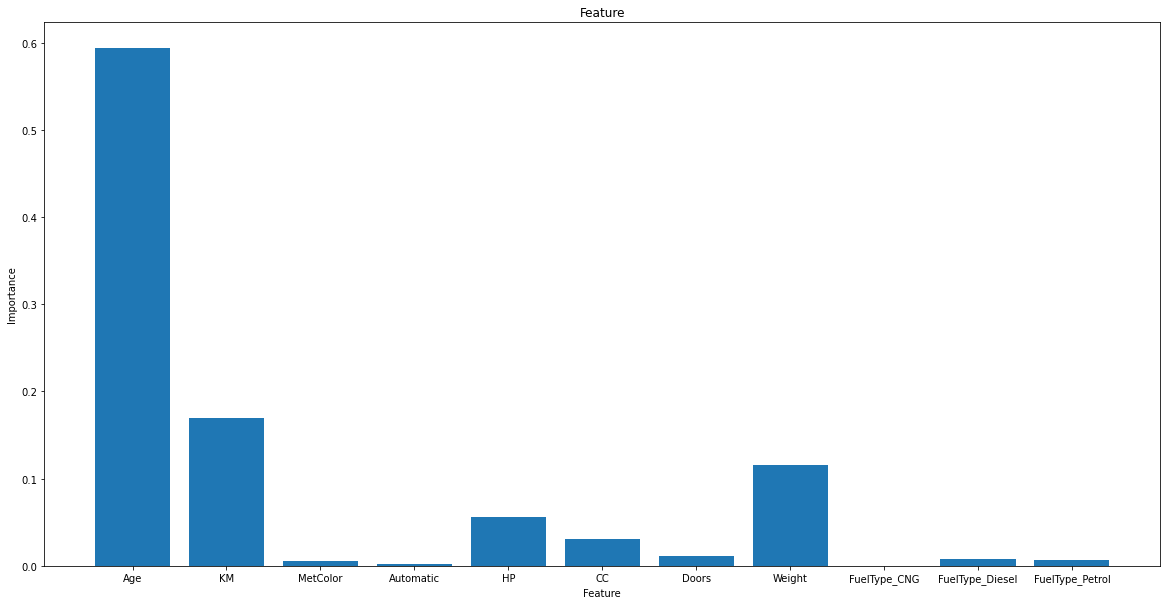

In [30]:
importance = rfr_best_model.featureImportances
x_values = list(range(len(importance)))
plt.figure(figsize=(20,10));
plt.bar(x_values, importance, orientation = 'vertical')
feature_list = ['Age', 'KM', 'MetColor', 'Automatic' ,'HP', 'CC', 'Doors', 'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']
plt.xticks(x_values, feature_list)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature');

In [31]:
featuresDF = pd.DataFrame(list(zip(assembler.getInputCols(), rfr_best_model.featureImportances)), 
                          columns=["feature", "importance"])
featuresDF.sort_values(["importance"], ascending=False)

,feature,importance
0,Age,0.593649
1,KM,0.169681
7,Weight,0.116253
4,HP,0.056351
5,CC,0.030554
6,Doors,0.010901
9,FuelType_Diesel,0.007875
10,FuelType_Petrol,0.007328
2,MetColor,0.005279
3,Automatic,0.001685


<h1>Use the best model is Random forest to predict car price</h1>

- With the values below being: "Age", "KM", "MetColor", "Automatic" ,"HP", "CC", "Doors", "Weight", "FuelType_CNG", "FuelType_Diesel", "FuelType_Petrol"

In [32]:
from pyspark.ml.linalg import Vectors

data = [(Vectors.dense([20, 46000, 1, 0, 192, 2000, 4, 1205,1,0,0]), )]              
predictDF = spark.createDataFrame(data, ["features"])
data2 = [(Vectors.dense([35, 80000, 0, 1, 192, 1500, 3, 1000,0,1,0]), )]              
predictDF2 = spark.createDataFrame(data2, ["features"])

rfr_best_model.transform(predictDF).show()
rfr_best_model.transform(predictDF2).show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[20.0,46000.0,1.0...|20635.999968587912|
+--------------------+------------------+

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[35.0,80000.0,0.0...|11941.138731642028|
+--------------------+------------------+



<h1>Information</h1>

<strong>This project is implemented by group 09, Big Data Applications: Machine Learning at Scale, by Mr. Quach Dinh Hoang. Semester 1 year 2021-2022. Subject code: 211BDML434077. HCMUTE</strong>

Member:

- 18133047 - Vo Ha Nhat Tan

- 18133038 - Pham Dinh Nhien

- 1813304 - Nguyen Thanh Cong

- 18133061 - Trinh Cong Vien